mnist 데이터 받기

In [5]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml("mnist_784", version=1, as_frame=False)
mnist.keys()

# 데이터셋을 설명하는 DESCR키
# 샘플이 하나의 행, 특성이 하나의 열로 구성된 배열을 가진 data 키
# 레이블 배열을 담은 target 키

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

In [6]:
X, y = mnist["data"], mnist["target"]
X.shape

(70000, 784)

In [7]:
import matplotlib as mpl
import matplotlib.pyplot as plt

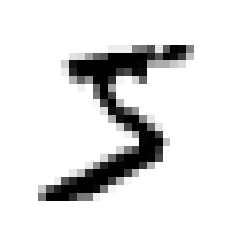

In [8]:
some_digit = X[0]
some_digit_image = some_digit.reshape(28, 28)

plt.imshow(some_digit_image, cmap="binary")
plt.axis("off")
plt.show()

In [9]:
print(y[0]) # 문자열 5
y = y.astype(np.uint8) # 숫자로 변환

5


이진 분류 훈련

In [10]:
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

In [11]:
y_train_5 = (y_train == 5)
y_test_5 = (y_test == 5)

확률적 경사 하강법

In [12]:
from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(X_train, y_train_5)

SGDClassifier(random_state=42)

In [13]:
sgd_clf.predict([some_digit])

array([ True])

In [19]:
from sklearn.model_selection import StratifiedKFold
from sklearn.base import clone

skflods = StratifiedKFold(n_splits=3, random_state=42, shuffle=True)

for train_index, test_index in skflods.split(X_train, y_train_5):
    clone_clf = clone(sgd_clf)
    X_train_folds = X_train[train_index]
    y_train_folds = y_train_5[train_index]
    X_test_fold = X_train[test_index]
    y_test_fold = y_train_5[test_index]
    
    clone_clf.fit(X_train_folds, y_train_folds)
    y_pred = clone_clf.predict(X_test_fold)
    n_correct = sㅂum(y_pred == y_test_fold)
    print(n_correct / len(y_pred))
    


0.9669
0.91625
0.96785


교차검증

In [20]:
from sklearn.model_selection import cross_val_score
cross_val_score(sgd_clf, X_train, y_train_5, cv=3, scoring="accuracy")

array([0.95035, 0.96035, 0.9604 ])

In [21]:
from sklearn.base import BaseEstimator

class Never5Classifer(BaseEstimator):
    def fit(self, X, y=None):
        return self
    def predict(self, X):
        return np.zeros( (len(X), 1), dtype=bool)

In [22]:
never_5_clf = Never5Classifer()
cross_val_score(never_5_clf, X_train, y_train_5, cv=3, scoring="accuracy")

array([0.91125, 0.90855, 0.90915])

높은 점수가 나온것으로 보이지만 사실은 5의 데이터가 0~9 중에서 10%이므로 전부다 아니다라고 하면 90%의 정확도를 받을 수 있다.

따라서 분류기는 정확도를 성능지표로 선호하지 않는다

**오차행렬**